In [34]:
import numbers
import os
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
onlyfiles = [f for f in listdir('/home/veniamin/Desktop/test_plate_standart')
if isfile(join('/home/veniamin/Desktop/test_plate_standart', f))]

In [35]:
from CSIKit.reader import get_reader
from CSIKit.util import csitools
dataframes = []
phase_dataframes = []
for file in onlyfiles:
    filename = "/home/veniamin/Desktop/test_plate_standart/{}".format(file)
    my_reader = get_reader(filename)
    csi_data = my_reader.read_file(filename, scaled=True)
    csi_phase, no_frames, no_subcarriers = csitools.get_CSI(csi_data, metric="phase")
    csi_amplitude, no_frames, no_subcarriers = csitools.get_CSI(csi_data, metric="amplitude")
    #print(csi_amplitude)
    new_filename = filename.replace("pcap", "csv")
    df = pd.DataFrame(csi_amplitude.reshape(-1, 256))
    df.to_csv(path_or_buf=filename,header=False,index=False)
    phase_df = pd.DataFrame(csi_phase.reshape(-1, 256))

    dataframes.append(df)
    phase_dataframes.append(phase_df)
    os.rename(filename, new_filename)
print("renamed files:", len(phase_dataframes))

renamed files: 105


<AxesSubplot:>

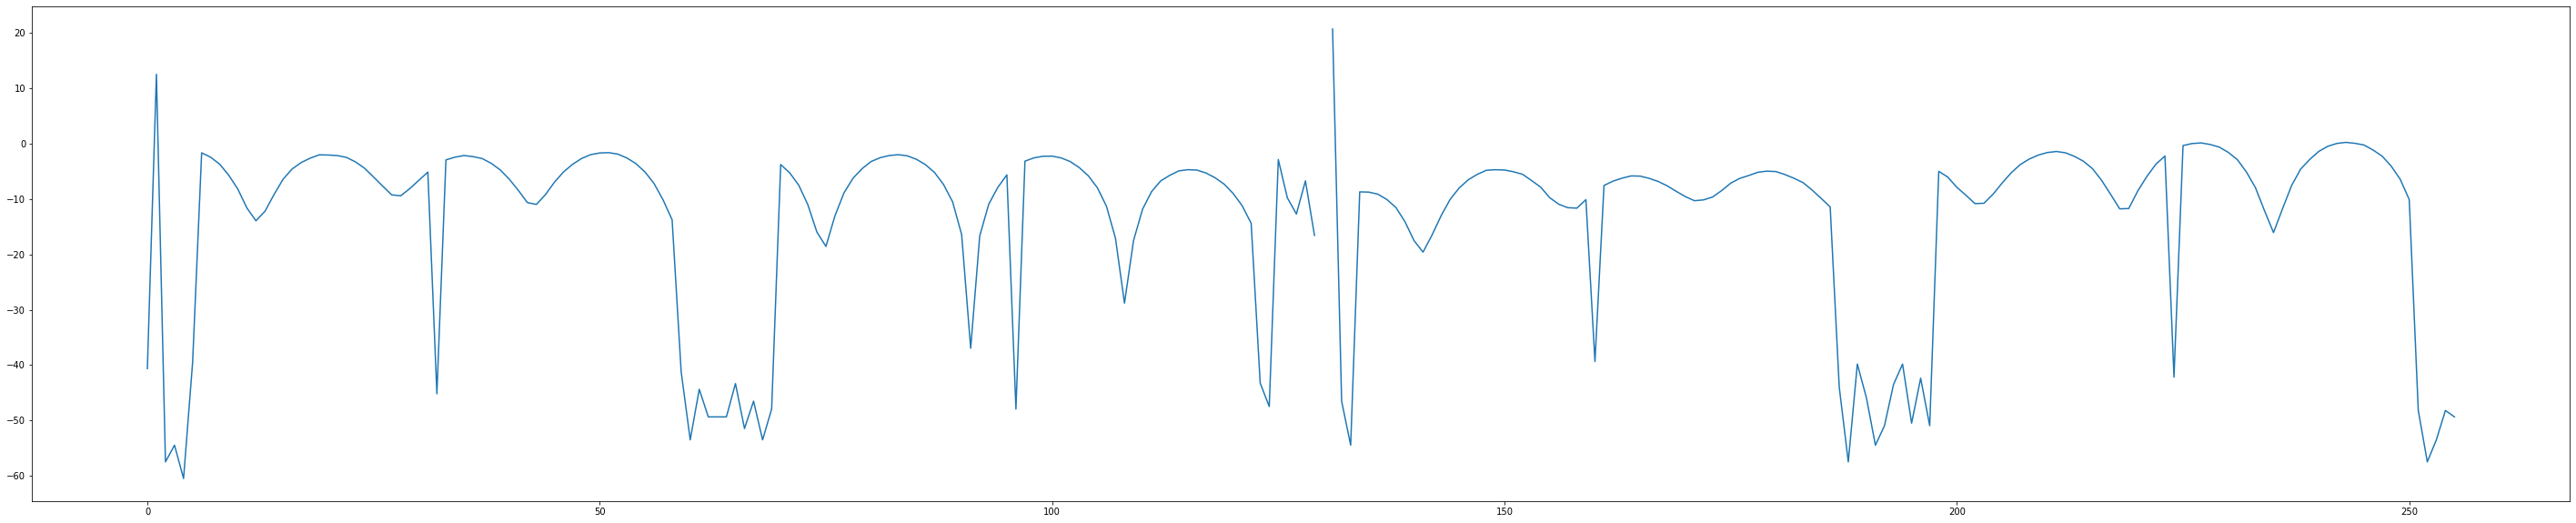

In [36]:
pd.DataFrame(df.iloc[0]).plot.line(figsize=
[50,10], legend=False)

<AxesSubplot:>

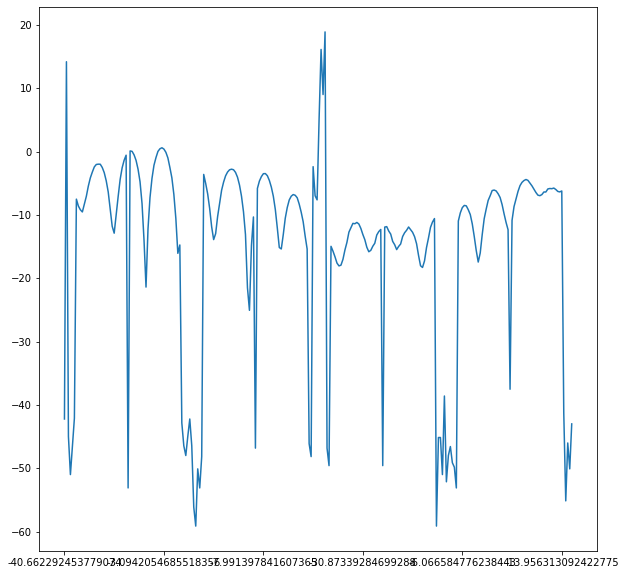

In [37]:
falldown1_df = pd.read_csv("/home/veniamin/Desktop/test_plate_standart/Falldown_1.csv")
pd.DataFrame(falldown1_df.iloc[0]).plot.line(figsize=
[10,10], legend=False)

<AxesSubplot:>

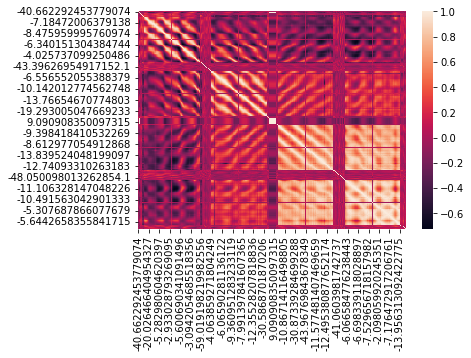

In [38]:
import seaborn as sea
sea.heatmap(falldown1_df.corr())


In [39]:
from numpy import NaN
from sklearn.preprocessing import StandardScaler
import numpy as np

# def replace(dataframe, message):
#     # new_data = pd.DataFrame()
#     # for index, row in dataframe.iterrows():
#     for index, row in dataframe.intertuples(index=True, name='Pandas'):
#         median = row.median()
#         # if not isinstance(median, (int, float, complex)):
#         #     print("median set to 0")
#         #     median = 0
#         # else:
#         #     print("median: ", median.astype(str))
#         row = row.replace(to_replace=[np.nan, np.inf, -np.inf], value=median, inplace=True)
#         print(type(row))
#         print(row)
#         ## new_data.append(row)
#         # row.fillna(value=median.astype(np.float64), inplace=True)
#         # row[np.isnan(row)] = median.astype(np.float64)
#     # return new_data
#     # dataframe = np.nan_to_num(dataframe)
#     ## new_data = pd.DataFrame(data=new_data, dtype=np.float64)
#     print(type(dataframe), dataframe.size)
#
#     return dataframe

def replace(dataframe, **kwargs):
    debug_replace = True if (kwargs.get('debug') == True) else False
    #print("\n=== replace.start ===") if debug_replace else 0
    finite = dataframe[np.isfinite(dataframe)]
    if finite.isnull().sum().sum() == 0:
        #print("=== nothing to replace, exiting ==\n") if debug_replace else 0
        return dataframe
    new_data = pd.DataFrame()
    counter = 0
    for i in range(0, len(finite)):
        series = finite.iloc[i]
        median = series.median()
        if not np.isnan(median):
            #print("median: ", median) if debug_replace else 0
            if (series.isnull().sum() > 0) or (series.max() == np.inf) or (series.min() == -np.inf):
                series.replace(to_replace=[np.nan, np.inf, -np.inf], value=median, inplace=True)
                counter += 1
                #print(series.to_numpy, "\n") if debug_replace else 0
            new_data = new_data.append(series, ignore_index=True)
            #print(type(new_data), new_data.size) if debug_replace else 0
    #print("->", counter, " updates have been made") if counter > 0 else 0
    #print("=== replace.end ==\n") if debug_replace else 0
    return new_data

debug = False

phases_normalized = []
for phase in phase_dataframes:
    # phase = phase.replace(np.inf, phase.median())
    # phase = phase.replace(-np.inf, phase.median())
    # phase = phase.replace(NaN, phase.median())
    #phase = phase[~phase.isin([np.nan, np.inf, -np.inf]).any(phase.median())].astype(np.float64)
    #print(type(phase), phase.size) if debug else 0
    new_phase = replace(phase)
    #print(new_phase.size) if debug else 0
    phase_normalized = StandardScaler().fit_transform(new_phase)
    phases_normalized.append(phase_normalized)

amplitudes_normalized = []
for frame in dataframes:
    # print(df.median(0, skipna=True))
    # df = df.replace(np.inf, df.median())
    # df = df.replace(-np.inf, df.median())
    # df = df.replace(NaN, df.median())
    # df = df[~df.isin([np.nan, np.inf, -np.inf]).replace(median)]
    #print(type(frame), frame.size) if debug else 0
    new_frame = replace(frame)
    if new_frame.empty:
        pass
    else:
        nulls = new_frame.isnull().sum().sum()
        num = new_frame.to_numpy()
        #print(new_frame.size, " nulls: ", nulls, ", min value: ", num.min(), ", max value: ", num.max()) if debug else 0
        if nulls < 1:
            frame_normalized = pd.DataFrame(StandardScaler().fit_transform(new_frame))
            amplitudes_normalized.append(frame_normalized)



/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/p

In [40]:
from sklearn.decomposition import PCA
pca = PCA(0.80)
training_amplitudes = pd.concat(amplitudes_normalized, ignore_index=True)
#training_phases = pd.concat(pd.Series(phases_normalized[:600]), ignore_index=True)
pca.fit(training_amplitudes)
#pca.fit(training_phases)
pca.explained_variance_ratio_

array([0.26077265, 0.08142213, 0.07663477, 0.06992363, 0.05881311,
       0.04341977, 0.03250359, 0.02873516, 0.0239097 , 0.01630102,
       0.01444786, 0.0134908 , 0.0124569 , 0.01018597, 0.00921522,
       0.00664366, 0.00598068, 0.00498373, 0.00476968, 0.00450566,
       0.00433873, 0.0041359 , 0.00404158, 0.00400646, 0.00397466,
       0.00394136])

In [41]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(onlyfiles, test_size=0.4)
for file in train:
    filename = "/home/veniamin/Desktop/test_plate_standart/{}".format(file.replace("pcap", "csv"))
    data = pd.read_csv(filename)
    # data.replace(np.inf, data.median())
    # data.replace(-np.inf, data.median())
    # data.replace(NaN, data.median())
    data = replace(data)
    data = pd.DataFrame(StandardScaler().fit_transform(data))
    #data.to_csv("/home/veniamin/Desktop/test_plate_standart/train/{}".format(file.replace("pcap", "csv")))
for file in test:
    filename = "/home/veniamin/Desktop/test_plate_standart/{}".format(file.replace("pcap", "csv"))
    data = pd.read_csv(filename)
    # data.replace(np.inf, data.median())
    # data.replace(-np.inf, data.median())
    # data.replace(NaN, data.median())
    data = replace(data)
    data = pd.DataFrame(StandardScaler().fit_transform(data))
    #data.to_csv("/home/veniamin/Desktop/test_plate_standart/test/{}".format(file.replace("pcap", "csv")))


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/p

In [42]:
import pywt
import matplotlib.pyplot as plt
#need to count every time
window_size = 50
N = 8
L = 16
def running_mean(window_size, matrix_el):
    return pd.Series(matrix_el).rolling(window=window_size, min_periods=1, center=True).mean().to_numpy()

data = []
plot = []
plot_data = []
label_array = []
data_label_array = []
scales = [2**(n+(l/L)) for n in range(N) for l in range(L)]
for filename in onlyfiles:
    df = pd.read_csv("/home/veniamin/Desktop/test_plate_standart/{}".format(filename.replace("pcap", "csv")))
    matrix = np.array(df)
    no_frames, no_subcarriers = matrix.shape
    matrix_transposed = np.transpose(matrix)
    new_csi = []
    for i in range(no_subcarriers):
        matrix_transposed[i] = running_mean(window_size, matrix_transposed[i])
        coef, freq = pywt.cwt(matrix_transposed[i], np.array(scales), "morl")
        new_csi.append(coef)
    label = filename.split("_")[0] if len(filename.split("_")) == 2 else "_".join(filename.split("_")[:2])
    plot.append((no_frames, label))
    if label not in label_array:
        plot_data.append(new_csi)
        label_array.append(label)
    data.append(new_csi)
    data_label_array.append(label)
    #plt.figure()
    #plt.specgram(coef)

print(label_array)
print(data)

['Walking_Perpendicular', 'Nothing', 'Hand_circle', 'Smoking', 'Falldown', 'Walking_along', 'Hand_move']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [43]:
target_labels = [label_array.index(i) for i in label_array]
print(target_labels)
frames = []
labels = []
for frame, label in plot:
    frames.append(frame)
    labels.append(label)
print(frames)
print(labels)

[0, 1, 2, 3, 4, 5, 6]
[216, 25, 47, 488, 127, 186, 19, 148, 27, 27, 290, 25, 165, 394, 138, 269, 4, 7, 449, 415, 8, 7, 11, 4, 222, 120, 258, 169, 6, 273, 6, 13, 112, 8, 206, 330, 63, 168, 501, 542, 23, 309, 10, 282, 163, 100, 50, 155, 62, 186, 400, 319, 42, 6, 211, 11, 79, 171, 118, 134, 24, 23, 12, 19, 23, 30, 72, 144, 131, 245, 32, 20, 124, 7, 271, 18, 86, 37, 669, 15, 785, 105, 188, 3, 66, 253, 119, 161, 98, 37, 21, 23, 236, 8, 215, 32, 32, 153, 6, 9, 240, 587, 77, 16, 8]
['Walking_Perpendicular', 'Nothing', 'Hand_circle', 'Smoking', 'Walking_Perpendicular', 'Falldown', 'Nothing', 'Walking_Perpendicular', 'Nothing', 'Nothing', 'Walking_along', 'Nothing', 'Walking_Perpendicular', 'Smoking', 'Falldown', 'Smoking', 'Hand_move', 'Hand_move', 'Walking_along', 'Nothing', 'Hand_circle', 'Hand_move', 'Hand_circle', 'Hand_move', 'Falldown', 'Walking_Perpendicular', 'Walking_along', 'Walking_along', 'Hand_move', 'Smoking', 'Hand_circle', 'Hand_move', 'Walking_Perpendicular', 'Hand_move', 'Smo

{'Smoking': 'd', 'Hand_move': 'v', 'Walking_Perpendicular': 's', 'Hand_circle': '*', 'Falldown': '^', 'Nothing': 'd', 'Walking_along': 'v'}


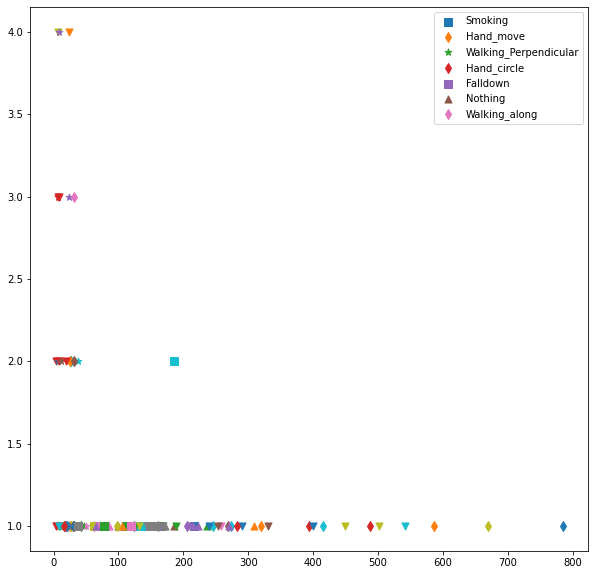

In [44]:
frames = np.array(frames)
pos = []
keys = {}
plt.figure(figsize = (10,10))
for num in frames:
   if num not in keys:
      keys[num] = 1
      pos.append(1)
   else:
      keys[num] += 1
      pos.append(keys[num])

markers = ["d", "v", "s", "*", "^", "d", "v", "*", "1", "+", "P", "X", "D", "x"]
markers = {key:val for key, val in zip(set(labels), markers)}
print(markers)
for frame, p, label in zip(frames, pos, labels):
  marker = markers[label]
  plt.scatter(frame, p, marker=marker, s=50)
plt.legend(markers.keys(), numpoints=1)
plt.show()

In [45]:
new_data = []
new_labels = []
nothing = pd.read_csv("/home/veniamin/Desktop/test_plate_standart/Nothing_1.csv")
for frame, label in zip(data, data_label_array):
    no_scales, no_frames = frame[0].shape
    if no_frames > max(frames):
        new_data.append(frame)
        new_labels.append(label)
for frame in new_data:
    if len(frame) < max(frames):
        frame.append(nothing[:(max(frames)-len(frame))])

In [ ]:
dataset = pd.DataFrame(new_data)
dataset['labels'] = labels
print(new_data)
dataset

In [47]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

train_data, test_data = train_test_split(dataset, test_size=0.3)
train_feature = train_data.drop(columns=['labels'])
train_target = train_data['labels']
test_feature = test_data.drop(columns=['labels'])
test_target = test_data['labels']
model = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
print(train_feature)
model.fit(train_feature, train_target)
target_predict = model.predict(test_feature)
print("accuracy: ", metrics.accuracy_score(test_target, target_predict))


ValueError: setting an array element with a sequence.